In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt



In [120]:
# Loading and preprocessing Data

In [121]:
# Loading data
file_path = Path("../apestogetherstrong/logistic_regression_test.csv")
df_equities = pd.read_csv(file_path)
df_equities.head()

,data_index,symbol,industry,sector,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
0,0,A,Medical Specialties,Health Technology,8/20/2020,318382,1651518,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
1,1,AA,Aluminum,Non-Energy Minerals,8/20/2020,1543881,5460701,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
2,2,AAAU,Investment Trusts/Mutual Funds,Miscellaneous,8/20/2020,151621,584100,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
3,3,AACG,Miscellaneous Commercial Services,Commercial Services,8/20/2020,10963,36708,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
4,4,AADR,Investment Trusts/Mutual Funds,Miscellaneous,8/20/2020,177,1191,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [217]:
list(df_equities['sector'].unique())

['Health Technology',
 'Non-Energy Minerals',
 'Miscellaneous',
 'Commercial Services',
 'Transportation',
 'Finance',
 'Electronic Technology',
 'Producer Manufacturing',
 'Retail Trade',
 'Distribution Services',
 'Consumer Non-Durables',
 'Process Industries',
 'Technology Services',
 'Consumer Services',
 'Health Services',
 'Industrial Services',
 'Utilities',
 'Communications',
 'Energy Minerals',
 'Consumer Durables',
 'Professional, Scientific, and Technical Services',
 'Manufacturing',
 'Finance and Insurance',
 'Educational Services',
 '0',
 'Transportation and Warehousing',
 'Mining, Quarrying, and Oil and Gas Extraction',
 'Wholesale Trade',
 'Administrative and Support and Waste Management and Remediation Services',
 'Construction',
 'Information',
 'Arts, Entertainment, and Recreation',
 'Health Care and Social Assistance',
 'Real Estate and Rental and Leasing',
 'Agriculture, Forestry, Fishing and Hunting',
 'Accommodation and Food Services',
 'Management of Companies an

In [122]:
df_equities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 44 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   data_index                                    623468 non-null  int64  
 1   symbol                                        623468 non-null  object 
 2   industry                                      623468 non-null  object 
 3   sector                                        623468 non-null  object 
 4   date                                          623468 non-null  object 
 5   volume                                        623468 non-null  int64  
 6   volume_previousday                            623468 non-null  int64  
 7   volume_greater_previousday                    623468 non-null  int64  
 8   volume_deathIncrease_up                       623468 non-null  int64  
 9   volume_hospitalizedIncrease_up                62

In [123]:
df_sector = df_equities.loc[df_equities['sector'] == "Finance"]

In [124]:
df_sector1 = df_equities.loc[df_equities['sector'] == "Health Technology"]

In [125]:
df_sector.tail()

,data_index,symbol,industry,sector,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
505059,505059,ZION,Regional Banks,Finance,11/30/2020,2000785,1205036,1,0,0,...,0,344231,360586,0,150031,166503,0,1520240,1873837,0
505060,505060,ZIONL,Major Banks,Finance,11/30/2020,4673,5469,0,0,0,...,0,344231,360586,0,150031,166503,0,1520240,1873837,0
505061,505061,ZIONN,Major Banks,Finance,11/30/2020,1602,2541,0,0,0,...,0,344231,360586,0,150031,166503,0,1520240,1873837,0
505062,505062,ZIONO,Major Banks,Finance,11/30/2020,1612,1308,1,0,0,...,0,344231,360586,0,150031,166503,0,1520240,1873837,0
505063,505063,ZIONP,Major Banks,Finance,11/30/2020,1203,2711,0,0,0,...,0,344231,360586,0,150031,166503,0,1520240,1873837,0


In [126]:
df_sector1.head()

,data_index,symbol,industry,sector,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
0,0,A,Medical Specialties,Health Technology,8/20/2020,318382,1651518,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
20,20,ABBV,Pharmaceuticals: Major,Health Technology,8/20/2020,3140007,3967446,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
23,23,ABEO,Pharmaceuticals: Generic,Health Technology,8/20/2020,163350,414869,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
27,27,ABIO,Biotechnology,Health Technology,8/20/2020,240647,299508,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
29,29,ABMD,Medical Specialties,Health Technology,8/20/2020,64583,109454,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [154]:
df_sector2 = df_equities.loc[df_equities['sector'] == "Technology Services"]
df_sector2.head()

,data_index,symbol,industry,sector,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
42,42,ACCD,Information Technology Services,Technology Services,8/20/2020,50523,78280,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
57,57,ACIW,Packaged Software,Technology Services,8/20/2020,110023,138351,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
61,61,ACN,Information Technology Services,Technology Services,8/20/2020,338368,562222,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
81,81,ADBE,Packaged Software,Technology Services,8/20/2020,557622,755291,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
94,94,ADP,Data Processing Services,Technology Services,8/20/2020,434275,545192,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [159]:
df_sector3 = df_equities.loc[df_equities['sector'] == "Transportation"]
df_sector3.head()

,data_index,symbol,industry,sector,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
5,5,AAL,Airlines,Transportation,8/20/2020,27818132,46073616,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
15,15,AAWW,Air Freight/Couriers,Transportation,8/20/2020,124598,139324,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
206,206,AIRT,Air Freight/Couriers,Transportation,8/20/2020,4,1722,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
207,207,AIRTP,Air Freight/Couriers,Transportation,8/20/2020,53,221,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
208,208,AIRTW,Air Freight/Couriers,Transportation,8/20/2020,2120,7821,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [222]:
df_sector4 = df_equities.loc[df_equities['sector'] == 'Retail Trade']
df_sector4.head()

,data_index,symbol,industry,sector,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
11,11,AAP,Specialty Stores,Retail Trade,8/20/2020,440699,429388,1,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
26,26,ABG,Specialty Stores,Retail Trade,8/20/2020,18261,66044,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
53,53,ACI,Food Retail,Retail Trade,8/20/2020,397907,870496,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
119,119,AEO,Apparel/Footwear Retail,Retail Trade,8/20/2020,1866421,2076926,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
333,333,AMZN,Internet Retail,Retail Trade,8/20/2020,1684832,2484295,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [72]:
finance_df = df_sector.groupby(
    [pd.to_datetime(df_sector.date).dt.strftime('%b %Y'), 'sector']
)['iexClose'].mean().reset_index(name='Average_Value')
finance_df.head()


,date,sector,Average_Value
0,Aug 2020,Finance,29.077141
1,Nov 2020,Finance,31.218739
2,Oct 2020,Finance,29.036101
3,Sep 2020,Finance,28.284969


In [212]:
finance_df['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})
finance_df.head()

,date,sector,Average_Value,Average_positiveIncrease
0,Aug 2020,Finance,29.077141,39625.666667
1,Sep 2020,Finance,31.218739,150143.500000
2,Oc 2020,Finance,29.036101,61524.944028
3,Nov 2020,Finance,28.284969,39757.888715


In [76]:
f_positive = df_sector.groupby(
    [pd.to_datetime(df_sector.date).dt.strftime('%b %Y'), 'sector']
)['positiveIncrease'].mean().reset_index(name='Average_positiveIncrease')

In [214]:
f_positive['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})
f_positive.head()

,date,sector,Average_positiveIncrease,Average_Value
0,Aug 2020,Finance,39625.666667,29.077141
1,Sep 2020,Finance,150143.500000,31.218739
2,Oc 2020,Finance,61524.944028,29.036101
3,Nov 2020,Finance,39757.888715,28.284969


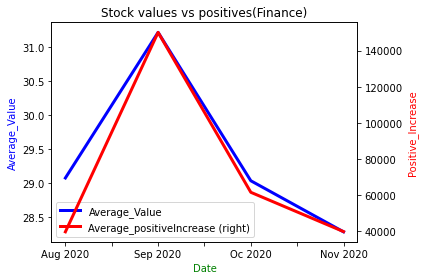

<Figure size 432x288 with 0 Axes>

In [241]:
#sns.set_style("whitegrid")
#plt.plot(df_equities['date'], df_equities['iexClose'], df_equities['positiveIncrease'], marker = 'x')
#plt.plot(df_equities['date'], df_equities['positiveIncrease'], marker = 'o')

#plt.xlabel('Date')
#plt.ylabel('Value')

ax = finance_df.plot(kind = 'line', x = 'date',
                  y = 'Average_Value', color = 'Blue',
                  linewidth = 3)

ax2 = f_positive.plot(kind = 'line', x = 'date',
                   y = 'Average_positiveIncrease', secondary_y = True,
                   color = 'Red',  linewidth = 3,
                   ax = ax)
plt.title('Stock values vs positives(Finance)')

#labeling x and y-axis
ax.set_xlabel('Date', color = 'g')
ax.set_ylabel('Average_Value', color = "b")
ax2.set_ylabel('Positive_Increase', color = 'r')

#defining display layout
plt.tight_layout()

#show plot
plt.show()

plt.savefig('Stock values vs positives(Finance).png')



In [134]:
health_tech_df = df_sector1.groupby(
    [pd.to_datetime(df_sector1.date).dt.strftime('%b %Y'), 'sector']
)['iexClose'].mean().reset_index(name='Average_Value')
health_tech_df.head()

,date,sector,Average_Value
0,Aug 2020,Health Technology,32.624964
1,Nov 2020,Health Technology,34.914458
2,Oct 2020,Health Technology,33.622895
3,Sep 2020,Health Technology,32.135182


In [207]:
health_tech_df['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})
health_tech_df.head()

,date,sector,Average_Value
0,Aug 2020,Health Technology,32.624964
1,Sep 2020,Health Technology,34.914458
2,Oc 2020,Health Technology,33.622895
3,Nov 2020,Health Technology,32.135182


In [135]:
h_positive = df_sector1.groupby(
    [pd.to_datetime(df_sector1.date).dt.strftime('%b %Y'), 'sector']
)['positiveIncrease'].mean().reset_index(name='Average_positiveIncrease')
h_positive.head()


,date,sector,Average_positiveIncrease
0,Aug 2020,Health Technology,39623.464186
1,Nov 2020,Health Technology,150143.500000
2,Oct 2020,Health Technology,61523.727273
3,Sep 2020,Health Technology,39765.998100


In [208]:
h_positive['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})
h_positive.head()

,date,sector,Average_positiveIncrease
0,Aug 2020,Health Technology,39623.464186
1,Sep 2020,Health Technology,150143.500000
2,Oc 2020,Health Technology,61523.727273
3,Nov 2020,Health Technology,39765.998100


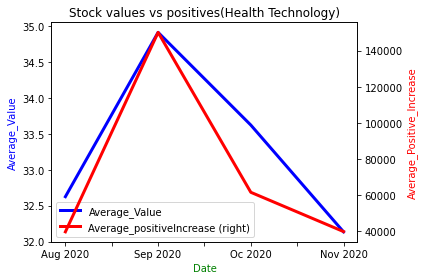

<Figure size 432x288 with 0 Axes>

In [242]:
ax = health_tech_df.plot(kind = 'line', x = 'date',
                  y = 'Average_Value', color = 'Blue',
                  linewidth = 3)

ax2 = h_positive.plot(kind = 'line', x = 'date',
                   y = 'Average_positiveIncrease', secondary_y = True,
                   color = 'Red',  linewidth = 3,
                   ax = ax)
plt.title('Stock values vs positives(Health Technology)')

#labeling x and y-axis
ax.set_xlabel('Date', color = 'g')
ax.set_ylabel('Average_Value', color = "b")
ax2.set_ylabel('Average_Positive_Increase', color = 'r')

#defining display layout
plt.tight_layout()

#show plot
plt.show()

plt.savefig("Stock values vs positives(Health Technology")

In [145]:
tech_services_df = df_sector2.groupby(
    [pd.to_datetime(df_sector2.date).dt.strftime('%m %Y'), 'sector']
)['iexClose'].mean().reset_index(name='Average_Value')
tech_services_df.head()

,date,sector,Average_Value
0,Aug 2020,Technology Services,67.337149
1,Nov 2020,Technology Services,71.746937
2,Oct 2020,Technology Services,69.042289
3,Sep 2020,Technology Services,65.956254


In [204]:
tech_services_df['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})
tech_services_df.head()

,date,sector,Average_Value
0,Aug 2020,Technology Services,67.337149
1,Sep 2020,Technology Services,71.746937
2,Oc 2020,Technology Services,69.042289
3,Nov 2020,Technology Services,65.956254


In [146]:
t_positive = df_sector2.groupby(
    [pd.to_datetime(df_sector2.date).dt.strftime('%b %Y'), 'sector']
)['positiveIncrease'].mean().reset_index(name='Average_positiveIncrease')
h_positive.head()

,date,sector,Average_positiveIncrease
0,Aug 2020,Health Technology,39623.464186
1,Nov 2020,Health Technology,150143.500000
2,Oct 2020,Health Technology,61523.727273
3,Sep 2020,Health Technology,39765.998100


In [205]:
t_positive['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})
t_positive.head()

,date,sector,Average_positiveIncrease
0,Aug 2020,Technology Services,39625.666667
1,Sep 2020,Technology Services,150143.500000
2,Oc 2020,Technology Services,61554.713655
3,Nov 2020,Technology Services,39764.059124


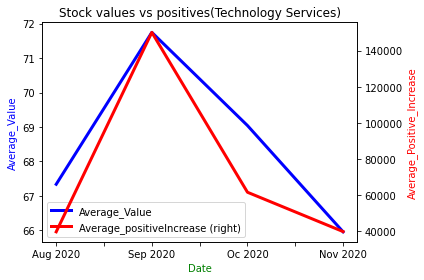

<Figure size 432x288 with 0 Axes>

In [243]:
ax = tech_services_df.plot(kind = 'line', x = 'date',
                  y = 'Average_Value', color = 'Blue',
                  linewidth = 3)

ax2 = t_positive.plot(kind = 'line', x = 'date',
                   y = 'Average_positiveIncrease', secondary_y = True,
                   color = 'Red',  linewidth = 3,
                   ax = ax)
plt.title('Stock values vs positives(Technology Services)')

#labeling x and y-axis
ax.set_xlabel('Date', color = 'g')
ax.set_ylabel('Average_Value', color = "b")
ax2.set_ylabel('Average_Positive_Increase', color = 'r')

#defining display layout
plt.tight_layout()

#show plot
plt.show()

plt.savefig('Stock values vs positives(Technology Services)')

In [187]:
transp_df = df_sector3.groupby(
    [pd.to_datetime(df_sector3.date).dt.strftime('%m %Y'), 'sector']
)['iexClose'].mean().reset_index(name='Average_Value')
transp_df.head()

,date,sector,Average_Value
0,08 2020,Transportation,35.713565
1,09 2020,Transportation,35.951979
2,10 2020,Transportation,36.965449
3,11 2020,Transportation,39.716519


In [199]:
transp_df['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})

In [200]:
transp_df.head()

,date,sector,Average_Value
0,Aug 2020,Transportation,35.713565
1,Sep 2020,Transportation,35.951979
2,Oc 2020,Transportation,36.965449
3,Nov 2020,Transportation,39.716519


In [201]:
transp_positive = df_sector3.groupby(
    [pd.to_datetime(df_sector3.date, exact = True).dt.strftime('%m %Y'), 'sector']
)['positiveIncrease'].mean().reset_index(name='Average_positiveIncrease')
transp_positive.head()

,date,sector,Average_positiveIncrease
0,08 2020,Transportation,39625.666667
1,09 2020,Transportation,39760.300000
2,10 2020,Transportation,61523.727273
3,11 2020,Transportation,150143.500000


In [202]:
transp_positive['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})
transp_positive.head()

,date,sector,Average_positiveIncrease
0,Aug 2020,Transportation,39625.666667
1,Sep 2020,Transportation,39760.300000
2,Oc 2020,Transportation,61523.727273
3,Nov 2020,Transportation,150143.500000


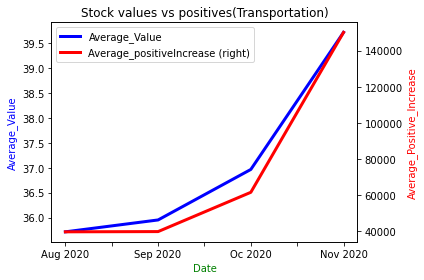

<Figure size 432x288 with 0 Axes>

In [257]:

ax = transp_df.plot(kind = 'line', x = 'date',
                  y = 'Average_Value', color = 'Blue',
                  linewidth = 3)

ax2 = transp_positive.plot(kind = 'line', x = 'date',
                   y = 'Average_positiveIncrease', secondary_y = True,
                   color = 'Red',  linewidth = 3,
                   ax = ax)
plt.title('Stock values vs positives(Transportation)')

#labeling x and y-axis
ax.set_xlabel('Date', color = 'g')
ax.set_ylabel('Average_Value', color = "b")
ax2.set_ylabel('Average_Positive_Increase', color = 'r')

#defining display layout
plt.tight_layout()

#show plot
plt.show()

plt.savefig('Stock values vs positives(Transportation)')

In [233]:
retail_df = df_sector4.groupby(
    [pd.to_datetime(df_sector4.date).dt.strftime('%m %Y'), 'sector']
)['iexClose'].mean().reset_index(name='Average_Value')
retail_df.head()

,date,sector,Average_Value
0,08 2020,Retail Trade,93.109036
1,09 2020,Retail Trade,89.986540
2,10 2020,Retail Trade,92.936194
3,11 2020,Retail Trade,93.124522
4,12 2020,Retail Trade,76.164813


In [234]:
retail_df['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020', 'Dec 2020']})

In [235]:
retail_df.head(5)

,date,sector,Average_Value
0,Aug 2020,Retail Trade,93.109036
1,Sep 2020,Retail Trade,89.986540
2,Oc 2020,Retail Trade,92.936194
3,Nov 2020,Retail Trade,93.124522
4,Dec 2020,Retail Trade,76.164813


In [237]:
retail_positive = df_sector4.groupby(
    [pd.to_datetime(df_sector4.date, exact = True).dt.strftime('%m %Y'), 'sector']
)['positiveIncrease'].mean().reset_index(name='Average_positiveIncrease')
retail_positive.head()

,date,sector,Average_positiveIncrease
0,08 2020,Retail Trade,39625.666667
1,09 2020,Retail Trade,39760.300000
2,10 2020,Retail Trade,61562.167316
3,11 2020,Retail Trade,150143.500000
4,12 2020,Retail Trade,207980.845644


In [238]:
retail_positive['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020', 'Dec 2020']})
retail_positive.head()

,date,sector,Average_positiveIncrease
0,Aug 2020,Retail Trade,39625.666667
1,Sep 2020,Retail Trade,39760.300000
2,Oc 2020,Retail Trade,61562.167316
3,Nov 2020,Retail Trade,150143.500000
4,Dec 2020,Retail Trade,207980.845644


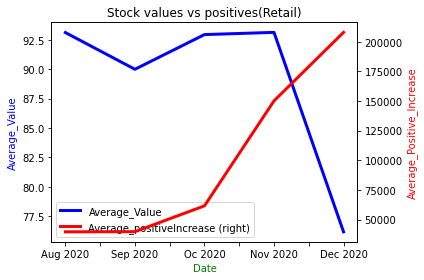

<Figure size 432x288 with 0 Axes>

In [256]:

ax = retail_df.plot(kind = 'line', x = 'date',
                  y = 'Average_Value', color = 'Blue',
                  linewidth = 3)

ax2 = retail_positive.plot(kind = 'line', x = 'date',
                   y = 'Average_positiveIncrease', secondary_y = True,
                   color = 'Red',  linewidth = 3,
                   ax = ax)
plt.title('Stock values vs positives(Retail)')

#labeling x and y-axis
ax.set_xlabel('Date', color = 'g')
ax.set_ylabel('Average_Value', color = "b")
ax2.set_ylabel('Average_Positive_Increase', color = 'r')

#defining display layout
plt.tight_layout()

#show plot
plt.show()

plt.savefig('Stock values vs positives(Retail).png')

In [247]:
transp_df = df_sector3.groupby(
    [pd.to_datetime(df_sector3.date).dt.strftime('%m %Y'), 'sector']
)['iexClose'].mean().reset_index(name='Average_Value')
transp_df.head()

,date,sector,Average_Value
0,08 2020,Transportation,35.713565
1,09 2020,Transportation,35.951979
2,10 2020,Transportation,36.965449
3,11 2020,Transportation,39.716519


In [248]:
transp_df['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})

In [249]:
transp_df.head()

,date,sector,Average_Value
0,Aug 2020,Transportation,35.713565
1,Sep 2020,Transportation,35.951979
2,Oc 2020,Transportation,36.965449
3,Nov 2020,Transportation,39.716519


In [250]:
transp_positive = df_sector3.groupby(
    [pd.to_datetime(df_sector3.date, exact = True).dt.strftime('%m %Y'), 'sector']
)['positiveIncrease'].mean().reset_index(name='Average_positiveIncrease')
transp_positive.head()

,date,sector,Average_positiveIncrease
0,08 2020,Transportation,39625.666667
1,09 2020,Transportation,39760.300000
2,10 2020,Transportation,61523.727273
3,11 2020,Transportation,150143.500000


In [251]:
transp_positive['date']= pd.DataFrame({'Date': ['Aug 2020', 'Sep 2020', 'Oc 2020', 'Nov 2020']})
transp_positive.head()

,date,sector,Average_positiveIncrease
0,Aug 2020,Transportation,39625.666667
1,Sep 2020,Transportation,39760.300000
2,Oc 2020,Transportation,61523.727273
3,Nov 2020,Transportation,150143.500000


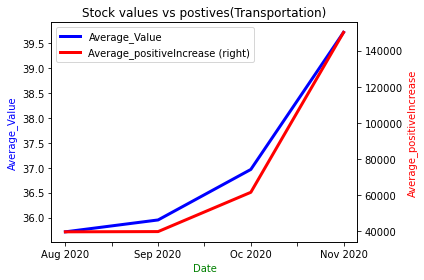

<Figure size 432x288 with 0 Axes>

In [254]:

ax = transp_df.plot(kind = 'line', x = 'date',
                  y = 'Average_Value', color = 'Blue',
                  linewidth = 3)

ax2 = transp_positive.plot(kind = 'line', x = 'date',
                   y = 'Average_positiveIncrease', secondary_y = True,
                   color = 'Red',  linewidth = 3,
                   ax = ax)
plt.title('Stock values vs postives(Transportation)')

#labeling x and y-axis
ax.set_xlabel('Date', color = 'g')
ax.set_ylabel('Average_Value', color = "b")
ax2.set_ylabel('Average_positiveIncrease', color = 'r')

#defining display layout
plt.tight_layout()

#show plot
plt.show()

plt.savefig('Stock values vs positives(Transportation).png')

In [27]:
#x_axis = df_sector["date"]
#y_axis = df_sector["iexClose"]
# Create bar plot.
#plt.bar(x_axis, y_axis, color="green", label='Finance')
# Create labels for the x and y axes.
#plt.xlabel("Date")
#plt.ylabel("Value")
# Create a title.
#plt.title("Finance")
# Add the legend.
#plt.legend()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000025036CEDF78> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#fig, ax1 = df_sector.plot(y= 'iexClose')
#ax21 = df_sector.plot(y= 'Positives')

#ax1.set_xlabel("Date")
#ax1.set_ylabel("Value", color=COLOR_TEMPERATURE, fontsize=14)
#ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

#ax21.set_ylabel("Positives", color=COLOR_PRICE, fontsize=14)
#ax21.tick_params(axis="y", labelcolor=COLOR_PRICE)

#fig.suptitle("Stock values vs positives", fontsize=20)
#fig.autofmt_xdate()

In [11]:
#rf_df = pd.DataFrame().assign(symbol=df_equities['symbol'],date=df_equities['date'],high=df_equities['high'],iexClose=df_equities['iexClose'],deathIncrease=df_equities['deathIncrease'],negativeIncrease=df_equities['negativeIncrease'],positiveIncrease=df_equities['positiveIncrease'],totalTestResultsIncrease=df_equities['totalTestResultsIncrease'],iexClose_positiveIncrease_up=df_equities['iexClose_hospitalizedIncrease_up'])
#print(rf_df)

       symbol        date    high  iexClose  deathIncrease  negativeIncrease  \
0           A   8/20/2020  98.150    98.065           1129            208472   
1          AA   8/20/2020  15.120    14.965           1129            208472   
2        AAAU   8/20/2020  19.440    19.400           1129            208472   
3        AACG   8/20/2020   1.126     1.190           1129            208472   
4        AADR   8/20/2020  56.330    58.260           1129            208472   
...       ...         ...     ...       ...            ...               ...   
623463    ZVO  12/23/2020   4.270     4.130           3393            304962   
623464   ZYME  12/23/2020  53.700    51.030           3393            304962   
623465   ZYNE  12/23/2020   3.505     3.415           3393            304962   
623466   ZYXI  12/23/2020  14.490    13.820           3393            304962   
623467   TRUE  12/23/2020   4.610     4.505           3393            304962   

        positiveIncrease  totalTestResu

In [43]:
#float or np.ndarray(dtype=float)
#rf_df['date'] = pd.to_datetime(rf_df['date'])    
#rf_df['date_delta'] = (rf_df['date'] - rf_df['date'].min())  / np.timedelta64(1,'D')
# converting to object
#rf_df = rf_df.astype({"date":'int64'}) 